# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released CONVERT TO DATETIME
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [3]:
pip install nb_black --user

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: colorama in c:\users\watte\.conda\anaconda1\lib\site-packages (from click>=6.5->black>='19.3'->nb_black) (0.4.4)



In [4]:
# this will help in making the Python code more structured automatically (good coding practice)



# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl #additional plotting
mpl.rcParams['figure.dpi'] = 60 #high-res plotting / cleaner charts
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## Loading the dataset

In [5]:
df = pd.read_csv('used_device_data.csv')


## Data Overview

In [6]:
original = df.copy()

In [7]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [8]:
#checking number of rows and columsn
print(f"The dataset has {original.shape[0]} rows and {original.shape[1]} columns")

The dataset has 3454 rows and 15 columns


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f



*   The dataset has 15 columns which consist of object, float64, and int64 datatypes.
*   There are missing values in some of the columns.



In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- Android is the most used operating system.
- Screen size ranges from approximately 5 inches to 31 inches.
- The majority of phone owners have 4G compared to 5G.
- Megapixels range from 0 to 48 for main and selfie cameras.
- The avergae internal memory for phones is 54.57GB.
- The average amount of Ram is 4GB per phone.
- The average amount of energy capacity for phone battery is 3,133.40 mAh.
- 75% of the phones have an energy capacity of 4,000 mAh or less.
- Cell phone weight varies from 69 grams to 855 grams.
- Most of the phones were released around 2015-2016.
- THe average length of time the phones have been used is 675 days.
- The average normalized used price is £4.36 while the average normalized new price is £5.23.
- OS, 4g, and 5g are object datatype = these will need to be converted to numeric before modeling.

In [11]:
df.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="crimson"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="crimson", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set1",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot



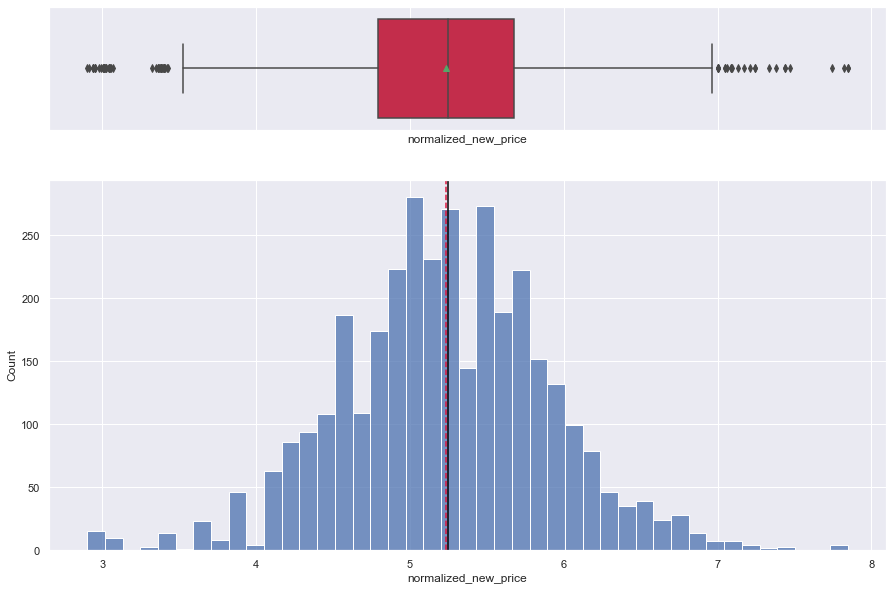

In [14]:
histogram_boxplot(original, 'normalized_new_price')

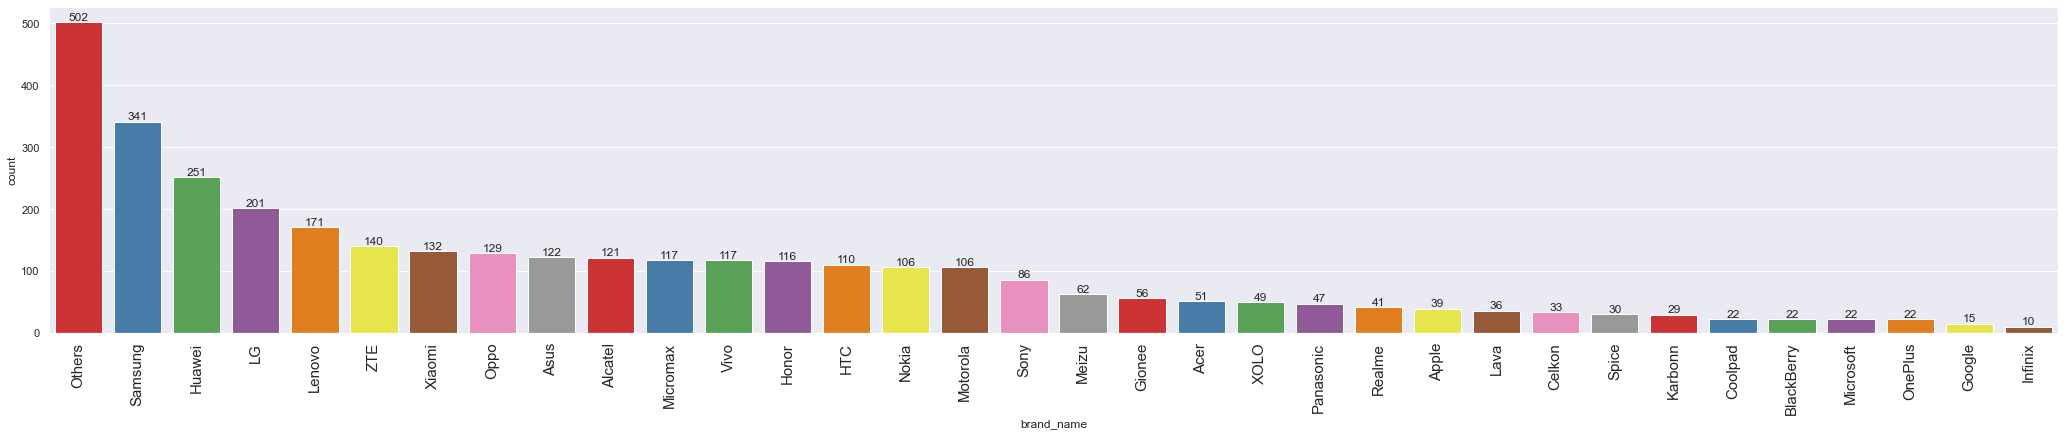

In [15]:
labeled_barplot(df, 'brand_name')

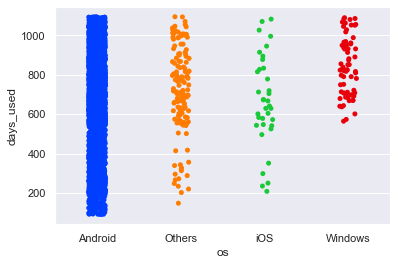

In [16]:
sns.set_palette("bright")
plt.rc('grid', color='w', linestyle='solid')
sns.stripplot(x="os", y="days_used", data=df);

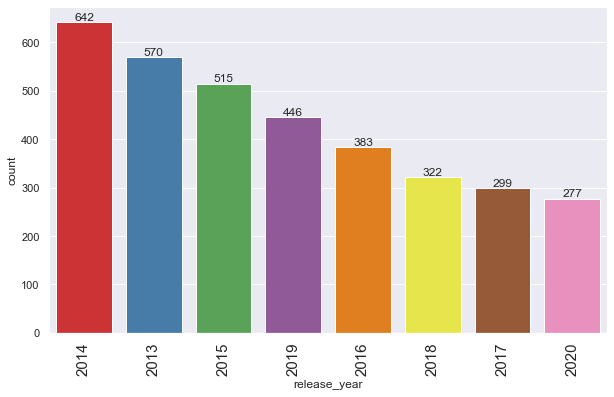

In [17]:
labeled_barplot(df, 'release_year')

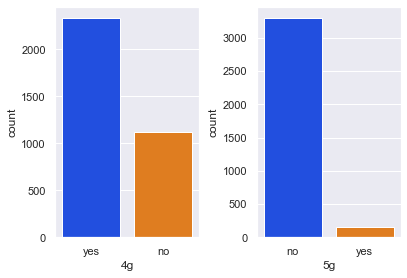

In [18]:
plt.subplot(1, 2, 1)
sns.countplot(x='4g', data=df)
plt.subplot(1, 2, 2)
sns.countplot(x='5g', data=df)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

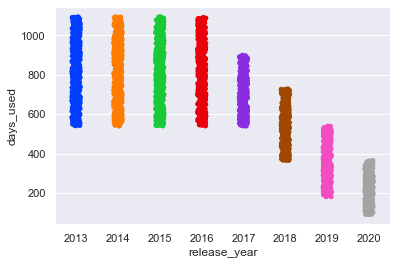

In [19]:
sns.set_palette("bright")
plt.rc('grid', color='w', linestyle='solid')
sns.stripplot(x="release_year", y="days_used", data=df);

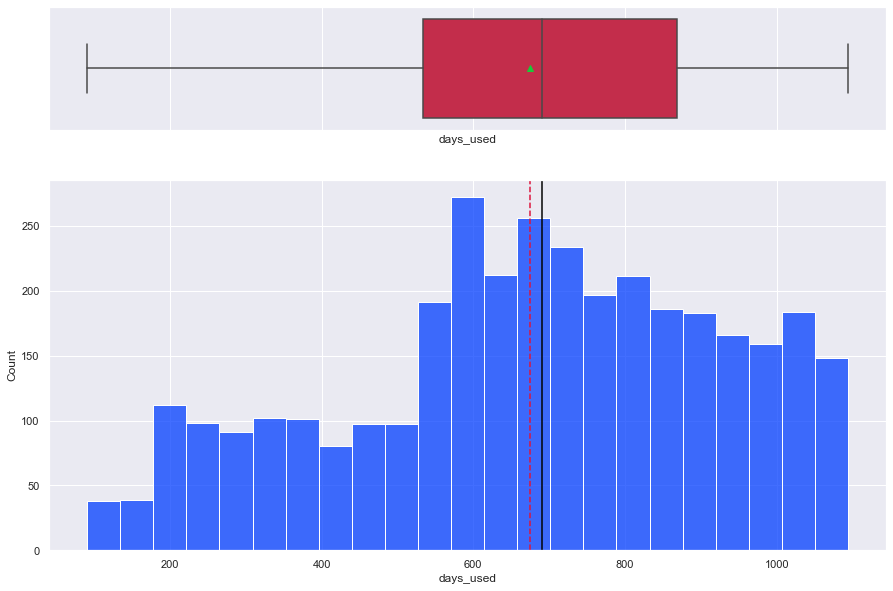

In [20]:
histogram_boxplot(df, 'days_used')

In [21]:
sorted_days = df.groupby(["brand_name"])["days_used"].mean().sort_values().index

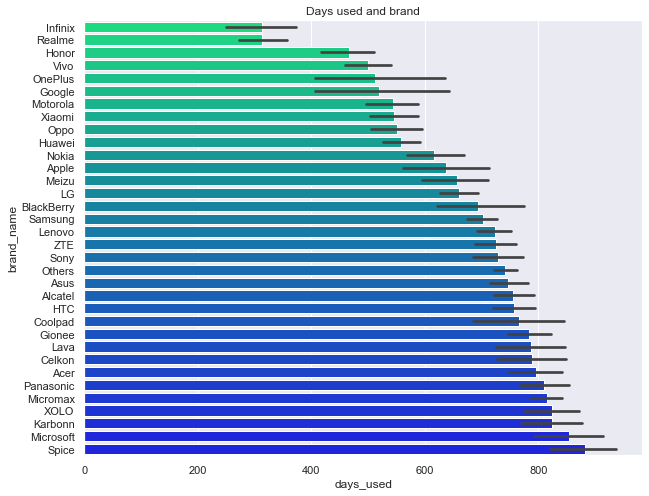

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='days_used', y='brand_name', order=sorted_days, palette='winter_r')
plt.title('Days used and brand')
plt.show()

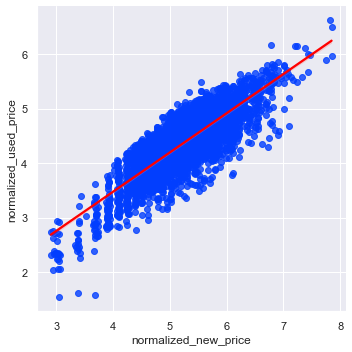

In [23]:
sns.lmplot(data=df, x="normalized_new_price", y="normalized_used_price",line_kws={'color':'red'})

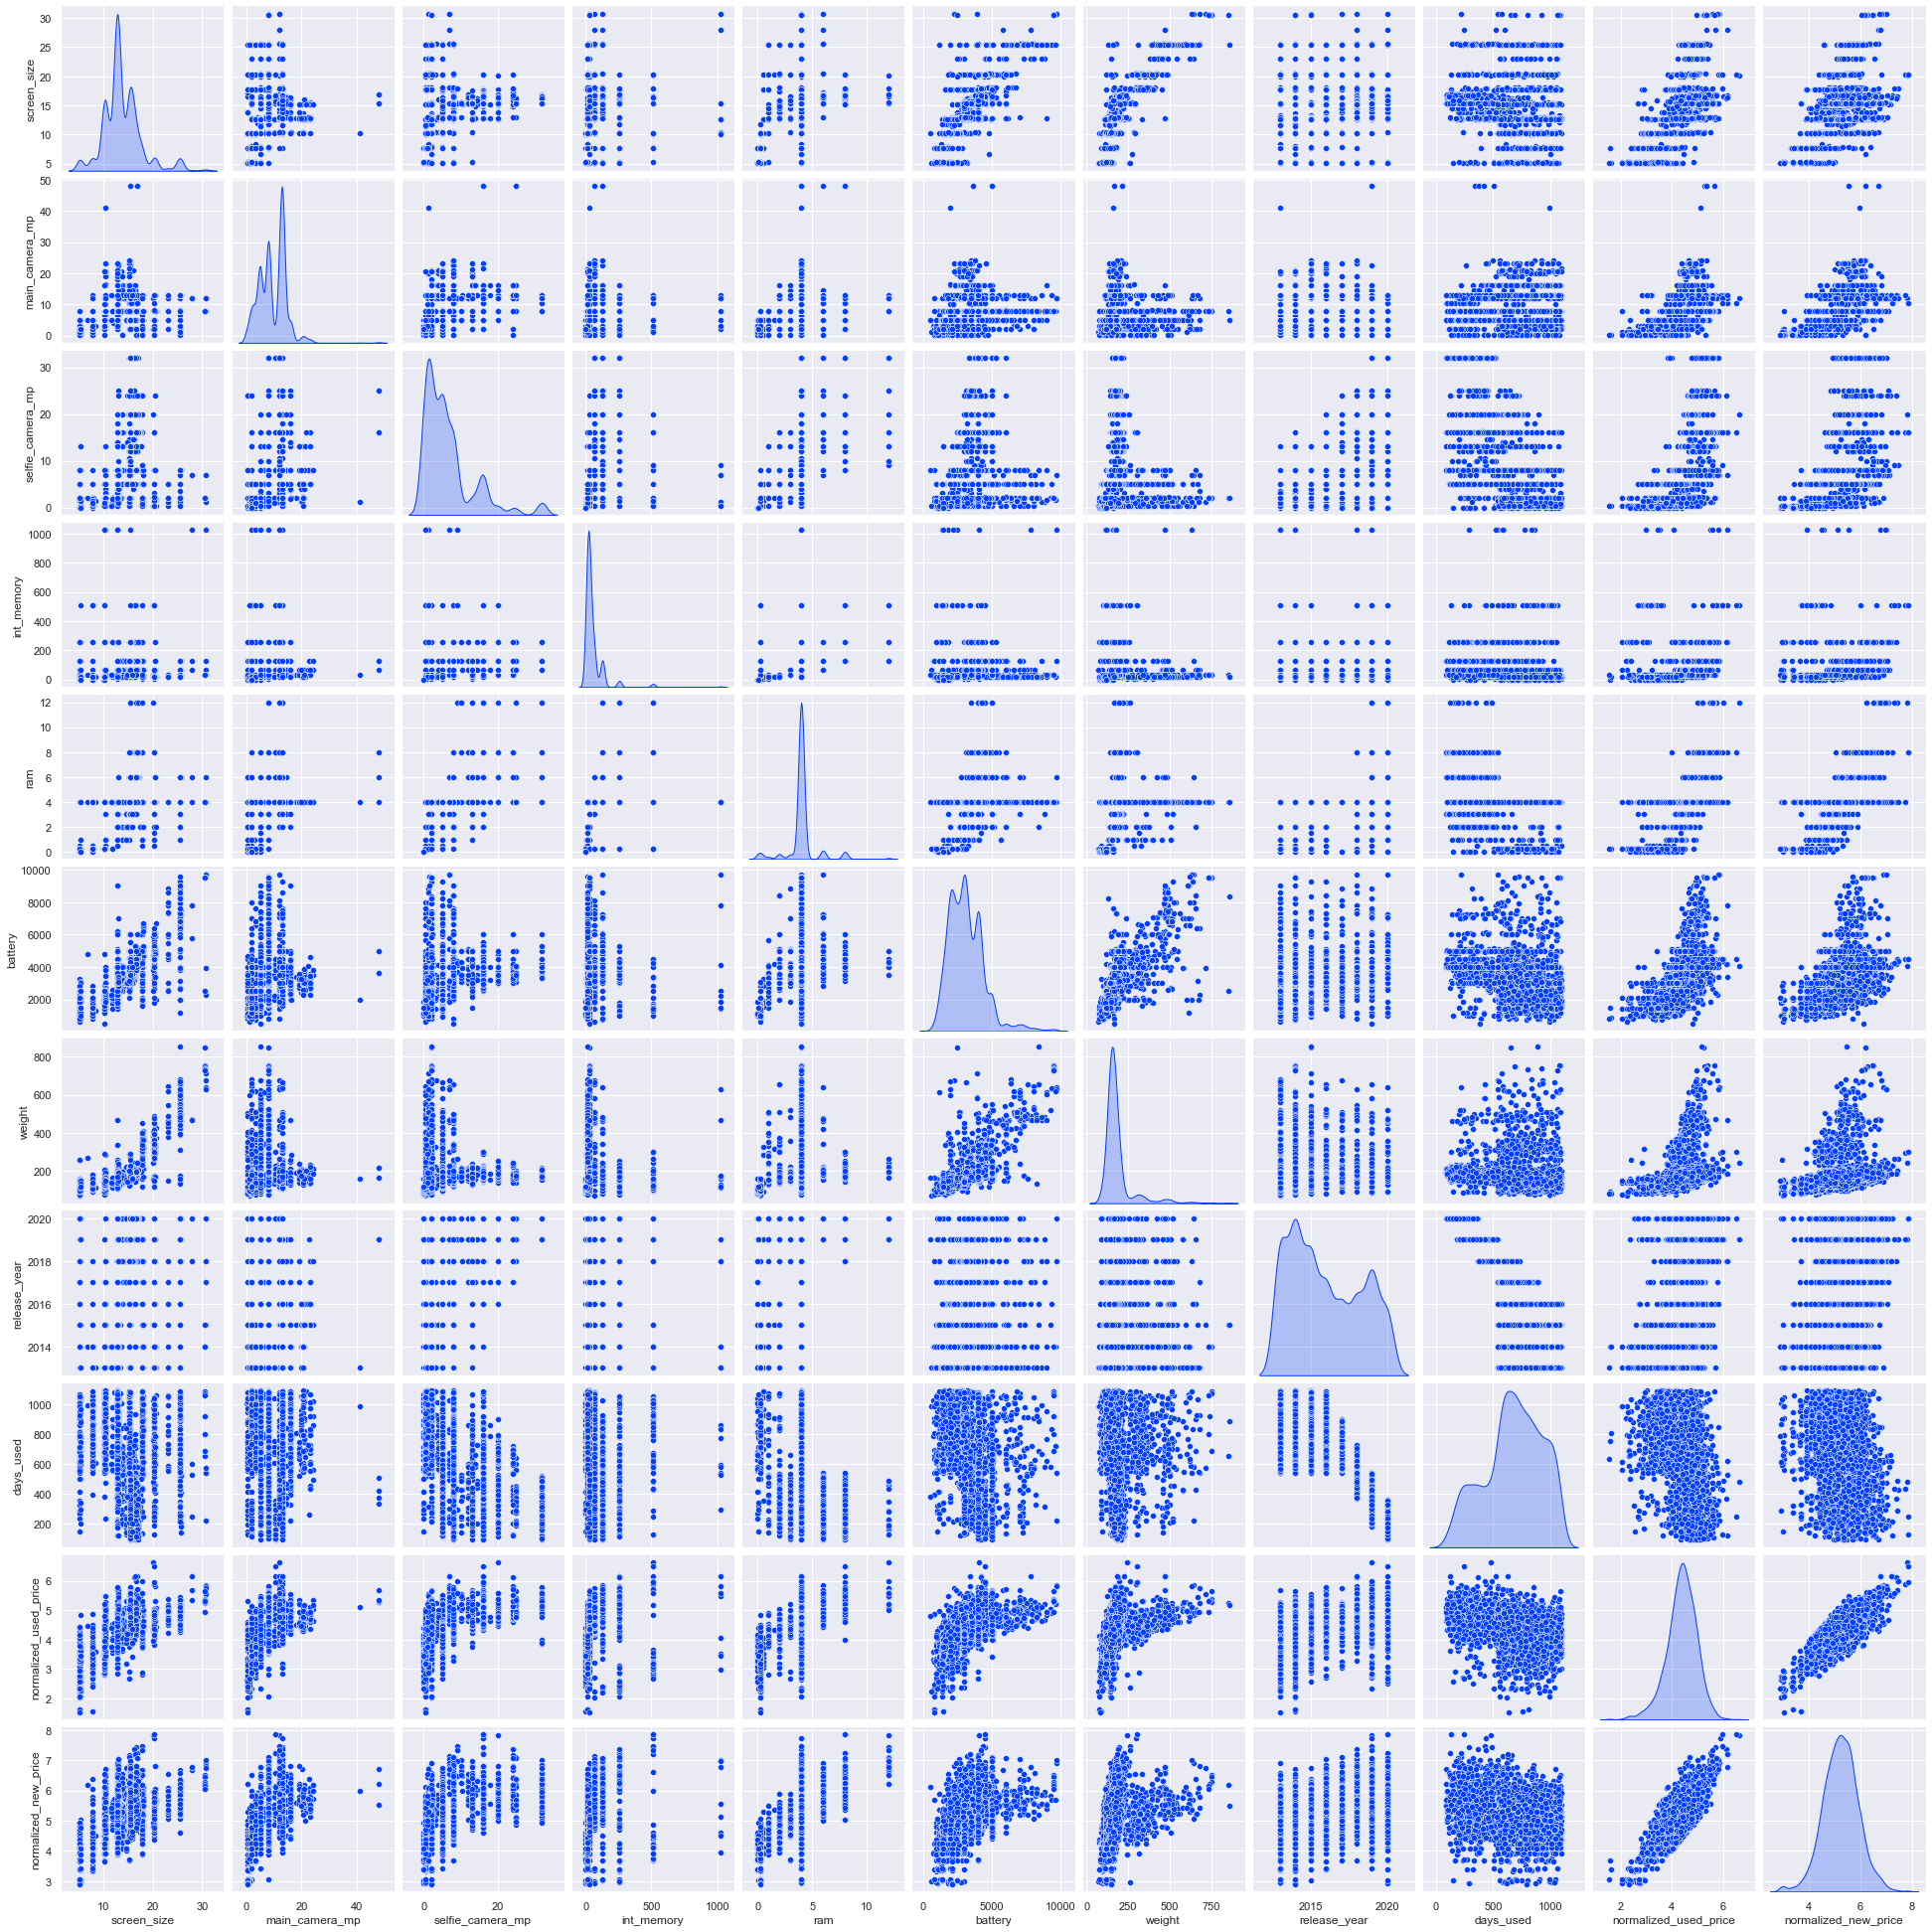

In [24]:
df_attr = df.iloc[:, 0:15]
sns.pairplot(
    df_attr, diag_kind="kde"
);  # to plot density curve instead of histogram on the diag

Question 1
1. What does the distribution of normalized used device prices look like?


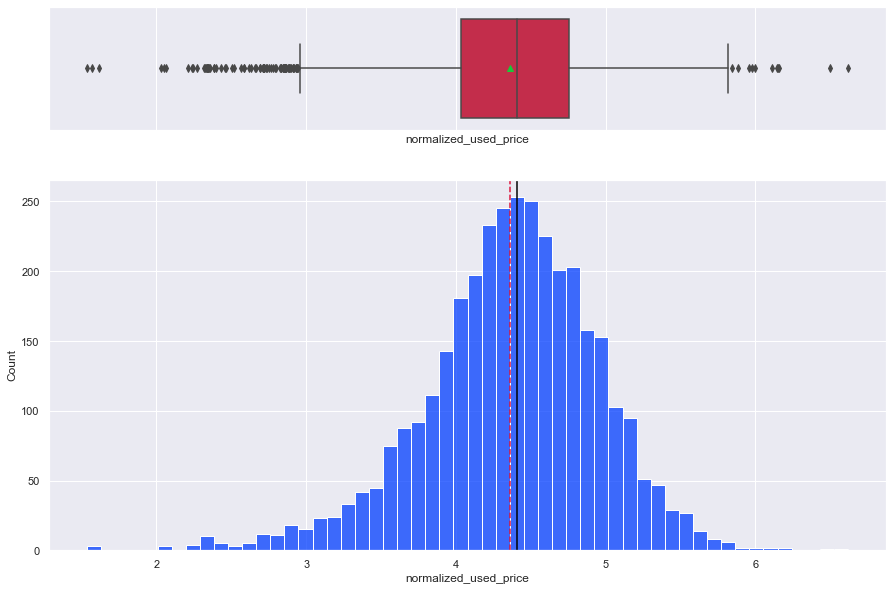

In [25]:
histogram_boxplot(df, 'normalized_used_price')

Question 2
2. What percentage of the used device market is dominated by Android devices?

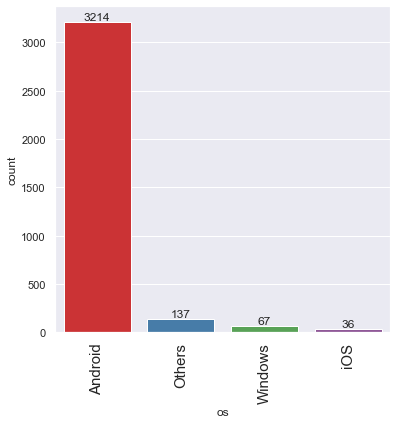

In [26]:
labeled_barplot(df, 'os')


3. The amount of RAM is important for the smooth functioning of a device How does the amount of RAM vary with the brand?

In [27]:
sorted_ram = df.groupby(["brand_name"])["ram"].mean().sort_values().index

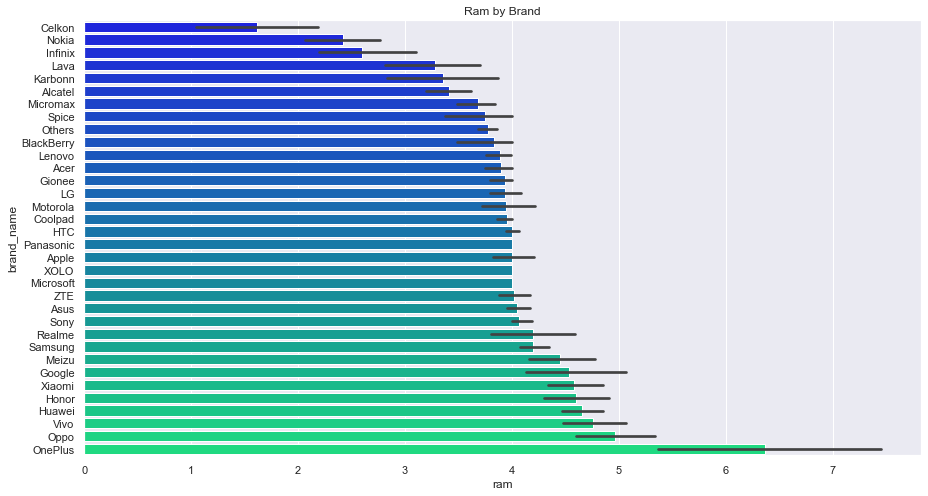

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='ram', y='brand_name', order=sorted_ram, palette='winter')
plt.title('Ram by Brand')
plt.show()

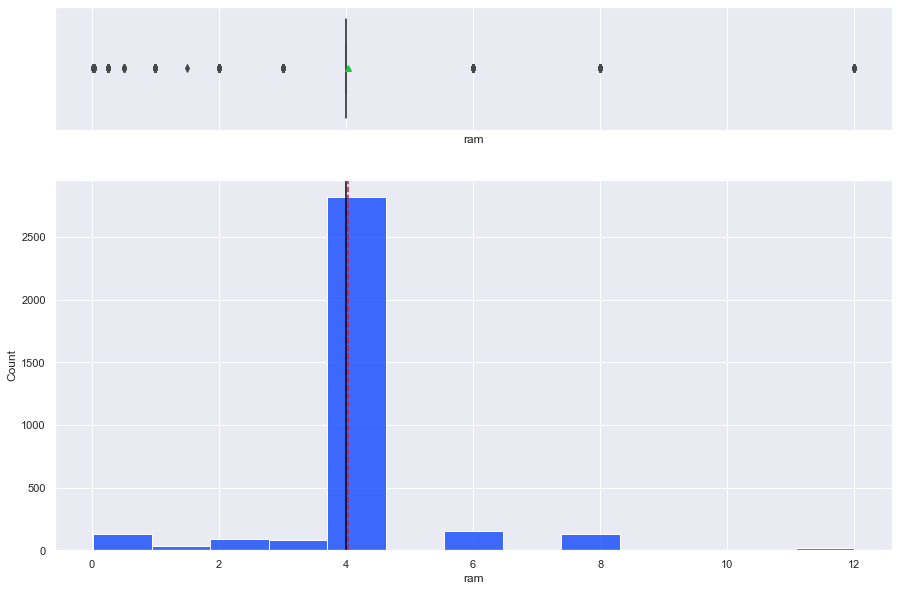

In [29]:
histogram_boxplot(df, 'ram')

Observations

- The majority of ram values are 4GB, which is also the mean, median. 
- Outliers appear to be present; however, the values of outliers are most likely proper values.

Question 4

• A large battery often increases a device’s weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

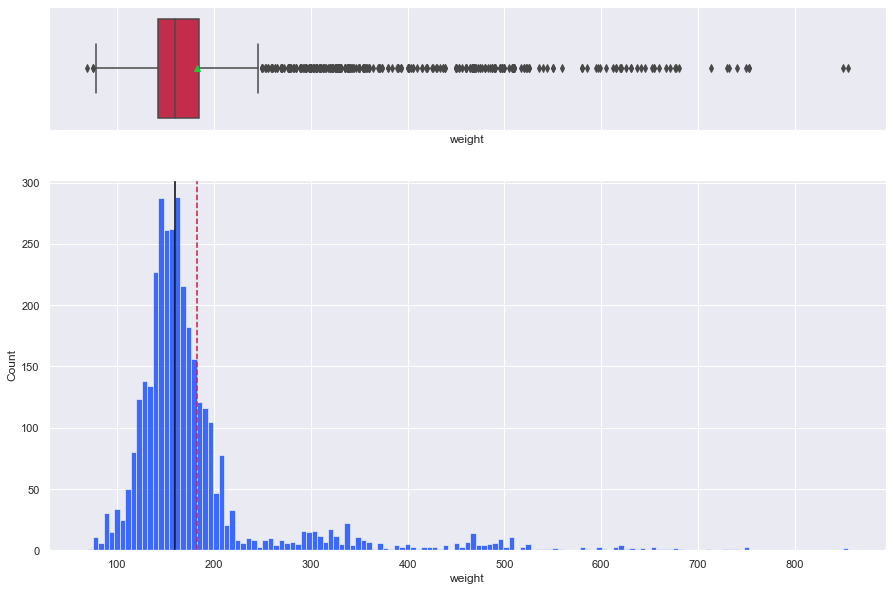

In [30]:
histogram_boxplot(df, "weight")

In [31]:
df['log_weight'] = np.log(df['weight'])

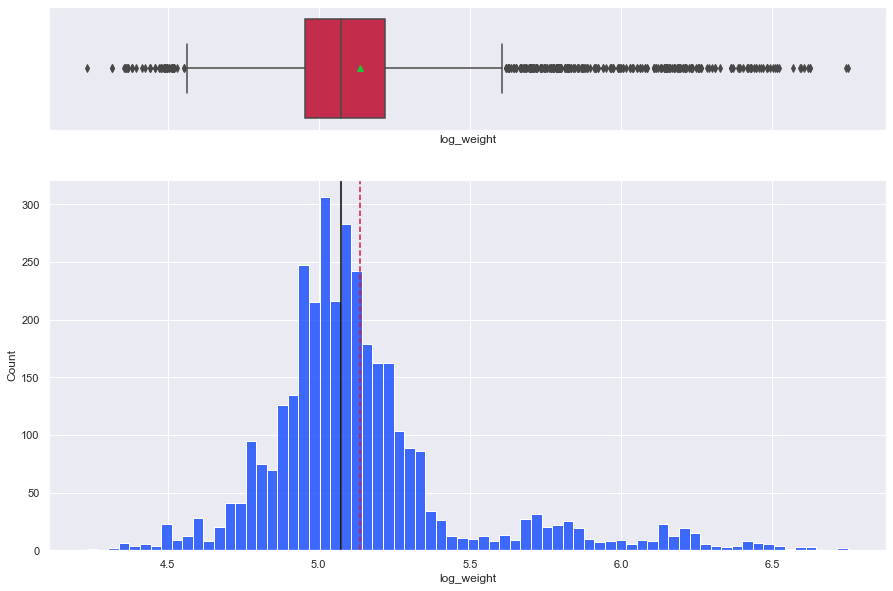

In [32]:
histogram_boxplot(df, 'log_weight')

In [33]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


In [34]:
battery = df['battery']

In [35]:
#simple function to find total number of batteries heavier than 4500
greater_than_4500 = 0
k = 4500
for i in battery:
  if i > k:
    greater_than_4500 = greater_than_4500 + 1

print(greater_than_4500)

341


In [36]:
big_battery = df[df['battery'] > 4500]

In [37]:
big_battery.groupby("brand_name")["weight"].count().sort_values(ascending=False)

brand_name
Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
LG           12
Realme       12
ZTE          10
Gionee       10
Acer          7
Infinix       6
Sony          6
Oppo          4
Nokia         1
Panasonic     1
Alcatel       1
Spice         1
HTC           1
Google        1
Micromax      1
Name: weight, dtype: int64

In [38]:
sorted_bat = df.groupby(["brand_name"])["battery"].mean().sort_values().index

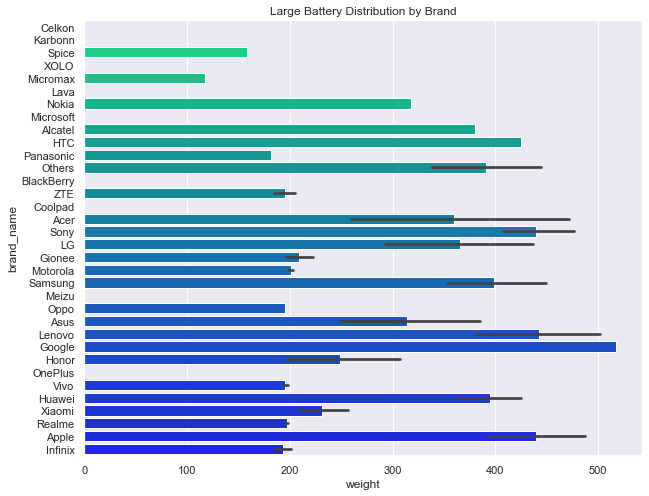

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(data=big_battery, x='weight', y='brand_name',palette='winter_r', order=sorted_bat)
plt.title("Large Battery Distribution by Brand")
plt.show()

In [40]:
big_battery.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176,5.220356
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051,5.153292
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001,5.153292


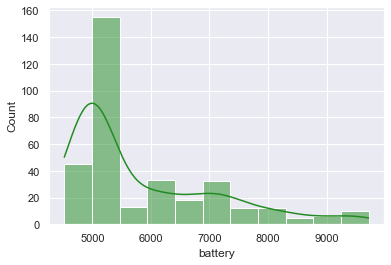

In [41]:
sns.histplot(data=big_battery, x='battery', color='forestgreen', kde=True);

The Distribution for batteries larger than 4500mAh is right-skewed.  

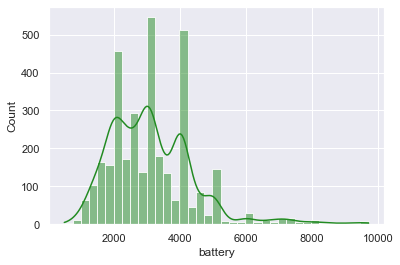

In [42]:
sns.histplot(data=df, x="battery", color='forestgreen', kde=True);

In [43]:
df['battery'].skew()

1.332269994146739

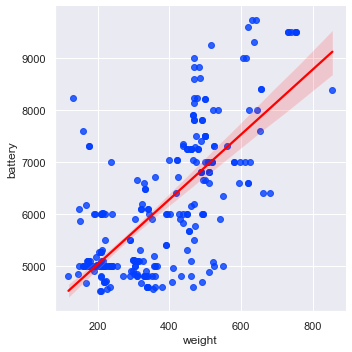

In [44]:
sns.lmplot(data=big_battery, y='battery', x='weight', line_kws={'color':'red'})

<Figure size 1080x576 with 0 Axes>

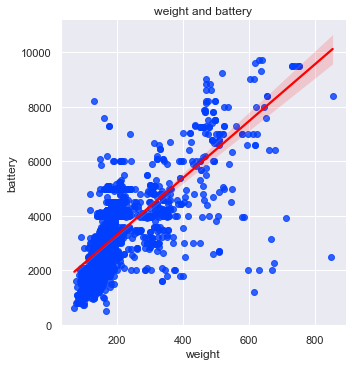

In [45]:
plt.figure(figsize=(15,8))
sns.lmplot(data=df, x='weight', y='battery', line_kws={'color':'red'})
plt.title('weight and battery')
plt.show()

Question 5. 

• Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [46]:
screen_in_inches = df['screen_size']/2.54

In [47]:
df['screen_in_inches'] = screen_in_inches

In [48]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight,screen_in_inches
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607,5.708661
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292,6.811024
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292,6.570866
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786,10.039370
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356,6.031496


In [49]:
df[(df.screen_in_inches>6)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight,screen_in_inches
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292,6.811024
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292,6.570866
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786,10.039370
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356,6.031496
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694,5.170484,6.389764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933,5.267858,6.011811
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317,5.480639,6.590551
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872,5.247024,6.039370
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829,5.105945,6.220472


In [50]:
#function to get number of values greater than 6 inches
greater_than_6 = 0
k=6
for i in screen_in_inches:
  if i > k:
    greater_than_6=greater_than_6 + 1

print(greater_than_6)


1099


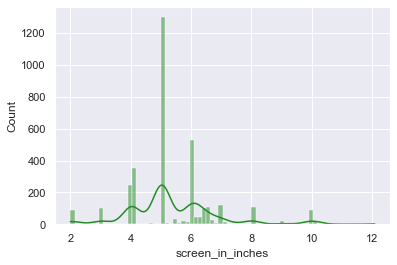

In [51]:
sns.histplot(data=df, x="screen_in_inches", color="forestgreen", kde=True)
plt.show()

In [52]:
greater_than_6 = df[df['screen_in_inches'] > 6]

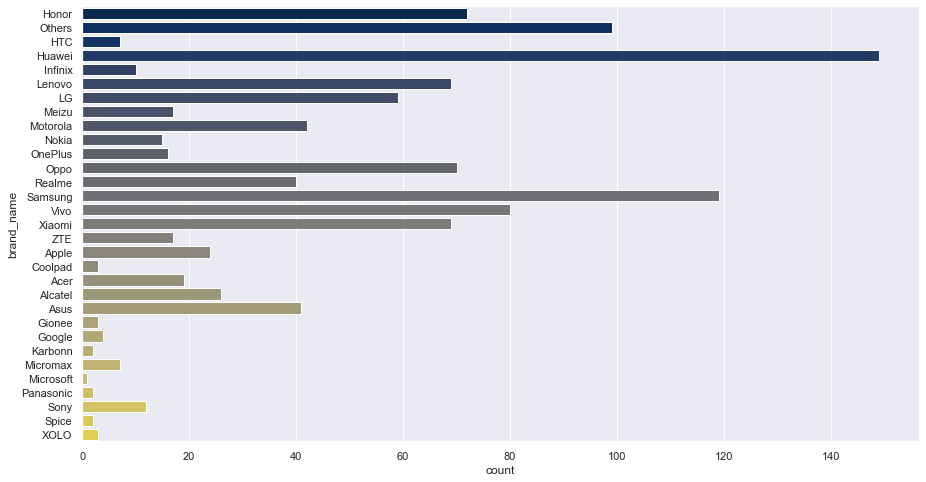

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(data=greater_than_6, y='brand_name', palette='cividis',orient='horizontal');


Question 6. 

• A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?


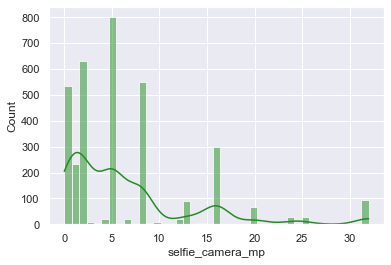

In [54]:
sns.histplot(data=df, x='selfie_camera_mp', kde=True, color='forestgreen')
plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
 15  log_

In [56]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight,screen_in_inches
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607,5.708661
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292,6.811024
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292,6.570866
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786,10.039370
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356,6.031496


In [57]:
greater_than_8mp =  df[df['selfie_camera_mp'] > 8]

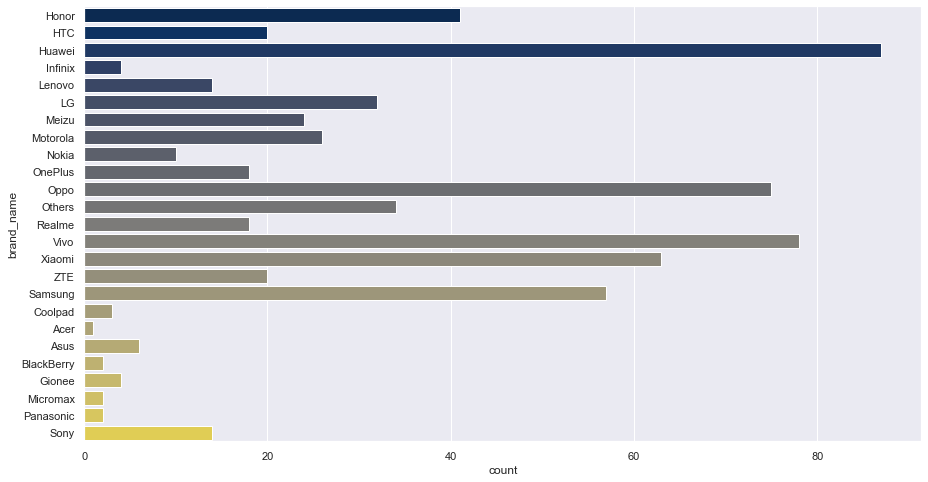

In [58]:
plt.figure(figsize=(15,8))
sns.countplot(data=greater_than_8mp, y='brand_name', palette='cividis',orient='horizontal');

7. Which attributes are highly correlated with the normalized price of a used device?

In [59]:
df2 = df.copy()

In [60]:
df2.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight,screen_in_inches
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889,0.867585,1.000000
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655,0.000955,0.150316
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479,0.100526,0.271640
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992,0.040364,0.071291
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056,0.173883,0.274449
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754,0.755934,0.813533
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540,0.957744,0.828890
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689,0.182795,0.364223
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625,-0.151932,-0.291723
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496,0.489262,0.614785


In [3]:


# let's plot the scatterplots of median price with all the features

for i in df.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df, x=i, y="normalized_used_price", color='blue')
    plt.show()


NameError: name 'df' is not defined

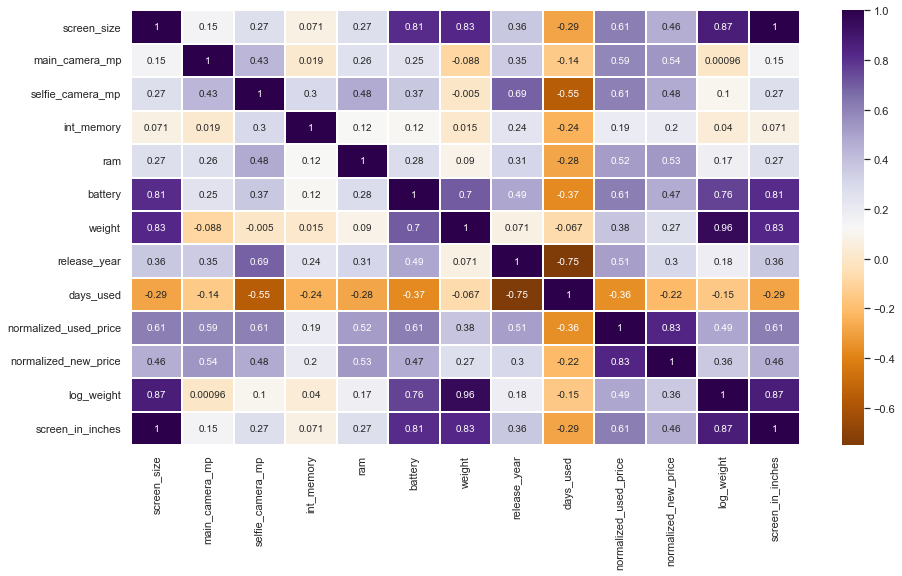

In [62]:
plt.figure(figsize=(15,8))
dfcorr = df.corr()

linewidths = 1.5
linecolor = "white"
cmap='PuOr'

# plotting the heatmap
hm = sns.heatmap(data=dfcorr,
                linewidths=linewidths,
                linecolor=linecolor,
                cmap=cmap,
                annot=True
                 )

# displaying the plotted heatmap
plt.show()


• There is a strong, negative correlation between used_price and days_used.  This is understandable, as the longer one uses the same device the lower in value it falls.

• There is a strong, positive correlation of new and used price.  
• A fairly strong, positive correlation exists among used_price and screen_size, main_camera_mp, selfie_camera_mp, battery, and RAM.

• Interestingly, release year has a stronger, positive relationship with used price than it does with new price.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [63]:
#Copy of dataset with log_value, log_weight and screen_in_inches columns
df2 = df.copy()

In [64]:
df5 = df.copy()

In [65]:
df5.columns


Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price', 'log_weight', 'screen_in_inches'],
      dtype='object')

In [66]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
 15  log_

###Missing Value Treatment

In [67]:
df5.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
log_weight                 7
screen_in_inches           0
dtype: int64

Using median to replace missing values

In [68]:
df5["selfie_camera_mp"] = df5["selfie_camera_mp"].fillna(
    value=df5.groupby(["brand_name"])["weight"].transform("median")
)


df5["main_camera_mp"] = df5["main_camera_mp"].fillna(
    value=df5.groupby(["brand_name"])["main_camera_mp"].transform("median")
)
df5["int_memory"] = df5["int_memory"].fillna(
    value=df5.groupby(["brand_name"])["int_memory"].transform("median")
)

In [69]:
df5["ram"] = df5["ram"].fillna(
    value = df5.groupby(["brand_name"])["ram"].transform("median")
  )
df5["battery"] = df5["battery"].fillna(
    value=df5.groupby(["brand_name"])["battery"].transform("median")
  )
df5["weight"] = df5["weight"].fillna(
    value=df5.groupby(["brand_name"])["weight"].transform("median")
  )

  

In [70]:
df5["log_weight"] = df5["log_weight"].fillna(
    df5.groupby(["brand_name"])["log_weight"].transform("median")
)


In [71]:
df5.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
log_weight                0
screen_in_inches          0
dtype: int64

In [72]:
numeric_only = ['screen_size', 'main_camera_mp', 'selfie_camera_mp','int_memory', 'ram', 'battery', 'weight', 'log_weight', 'normalized_new_price', 'days_used']

In [73]:
df5[df5.isnull().any(axis=1)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight,screen_in_inches
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642,5.342334,6.818898
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780,5.220356,6.059055
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460,5.220356,6.059055
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166,5.181784,6.059055
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297,5.105945,6.019685
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,4.405133,4.605370,5.342334,6.818898
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.495913,4.702115,5.220356,6.059055
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,329,4.370713,4.487287,5.220356,6.059055
281,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,356,4.417997,4.605970,5.181784,6.059055
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,4.423289,4.866072,5.105945,6.019685


In [74]:
df5.dropna(inplace=True)

In [75]:
df5.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
log_weight               0
screen_in_inches         0
dtype: int64

In [76]:
df5.shape

(3444, 17)

In [77]:
round(df5["log_weight"],2)

0       4.98
1       5.36
2       5.36
3       6.17
4       5.22
        ... 
3449    5.25
3450    5.30
3451    5.11
3452    5.08
3453    5.12
Name: log_weight, Length: 3444, dtype: float64

In [78]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3444 non-null   object 
 1   os                     3444 non-null   object 
 2   screen_size            3444 non-null   float64
 3   4g                     3444 non-null   object 
 4   5g                     3444 non-null   object 
 5   main_camera_mp         3444 non-null   float64
 6   selfie_camera_mp       3444 non-null   float64
 7   int_memory             3444 non-null   float64
 8   ram                    3444 non-null   float64
 9   battery                3444 non-null   float64
 10  weight                 3444 non-null   float64
 11  release_year           3444 non-null   int64  
 12  days_used              3444 non-null   int64  
 13  normalized_used_price  3444 non-null   float64
 14  normalized_new_price   3444 non-null   float64
 15  log_

Outlier Detection

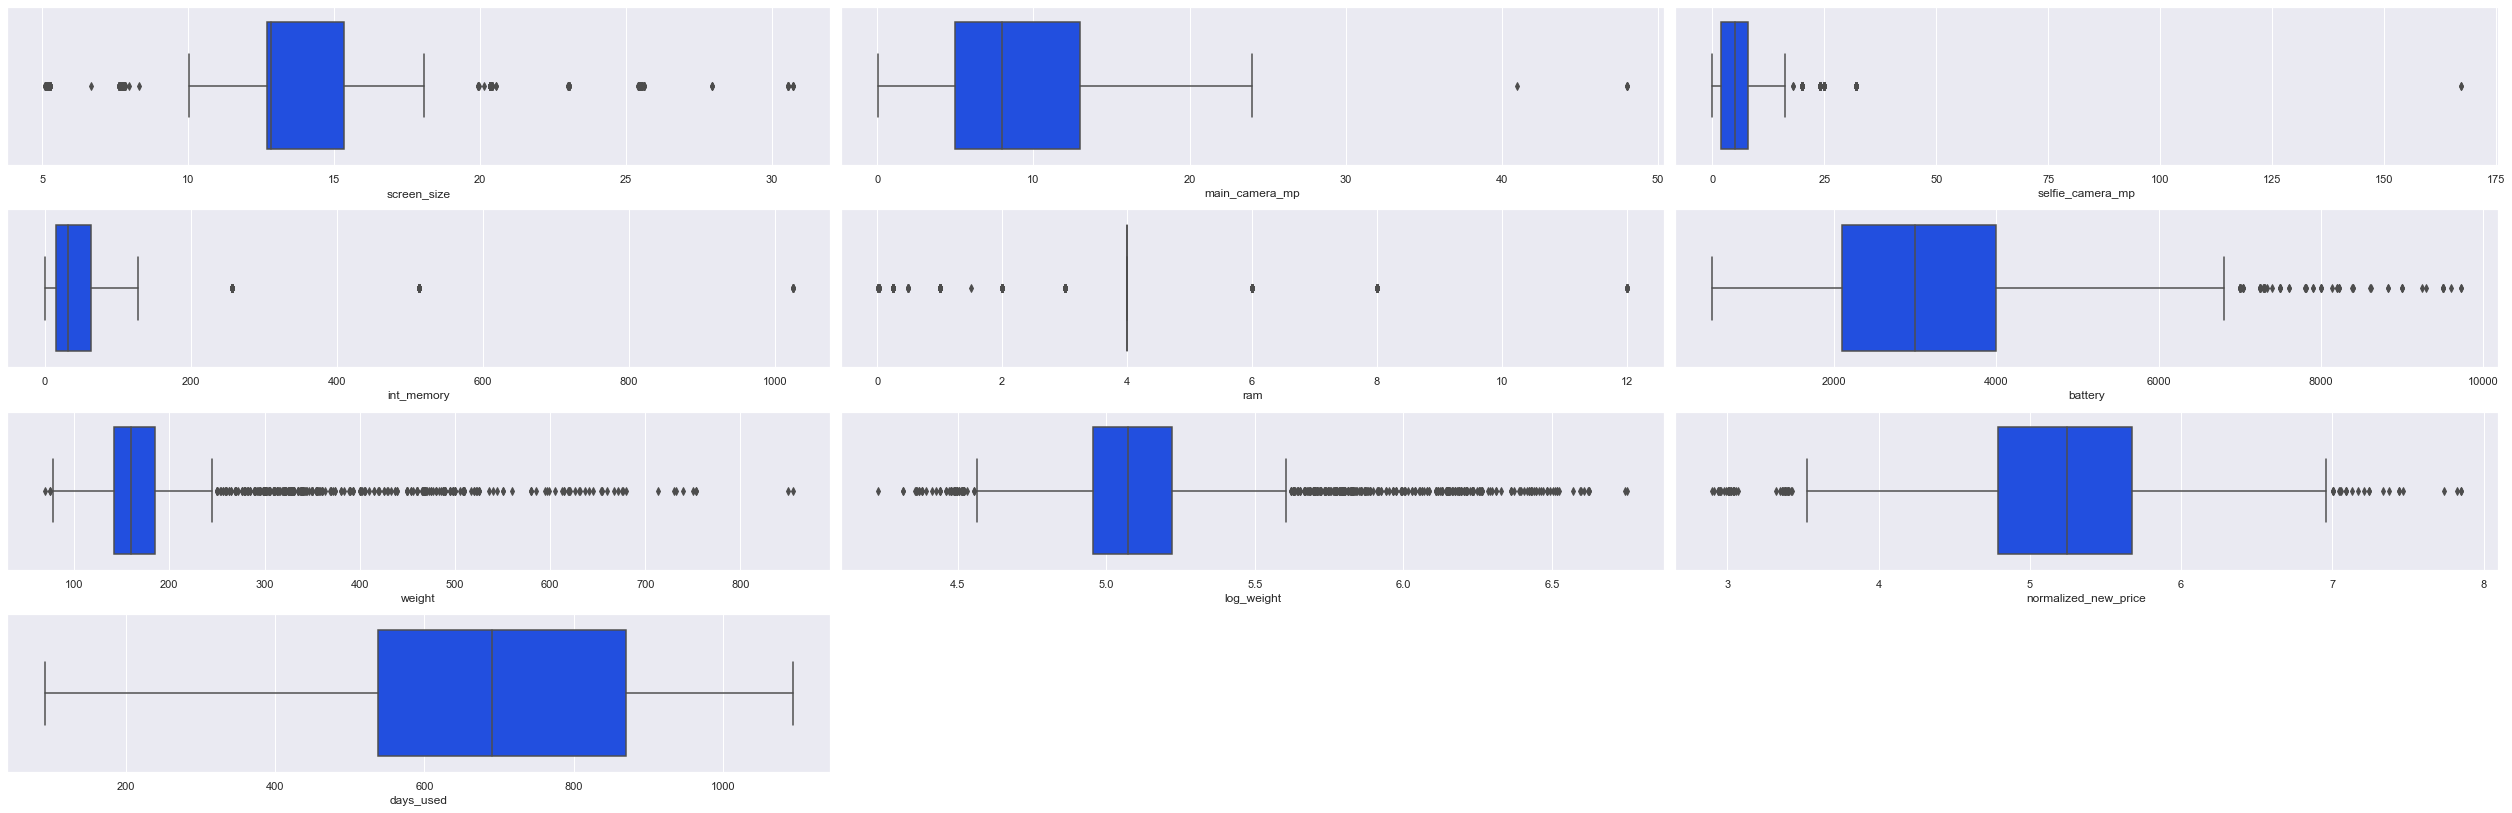

In [79]:
num_cols = df5.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(35, 25))

for i, variable in enumerate(numeric_only):
    plt.subplot(9, 3, i + 1)
    sns.boxplot(data=df5, x=variable)
    plt.tight_layout()

plt.show()



*   All features have outliers except for release_year and days_used.
*   Many of the outliers in the variables appear to be proper values.
*   We will cap the values for log_weight, screen_in_inches, and selfie_camera_mp using IQR.





In [80]:
upper_limit = df5['log_weight'].mean() + 3*df5['log_weight'].std()
lower_limit = df5['log_weight'].mean() - 3*df5['log_weight'].std()

upper_limit = df5['int_memory'].mean() + 3*df5['int_memory'].std()
lower_limit = df5['int_memory'].mean() - 3*df5['int_memory'].std()

upper_limit = df5['selfie_camera_mp'].mean() + 3*df5['selfie_camera_mp'].std()
lower_limit = df5['selfie_camera_mp'].mean() - 3*df5['selfie_camera_mp'].std()

In [81]:
df5['log_weight'] = np.where(
    df5['log_weight']>upper_limit,
    upper_limit,
    np.where(
        df5['log_weight']<lower_limit,
        lower_limit,
        df5['log_weight']
    )
)

In [82]:
df5['int_memory'] = np.where(
    df5['int_memory']>upper_limit,
    upper_limit,
    np.where(
        df5['int_memory']<lower_limit,
        lower_limit,
        df5['int_memory']
    )
)

In [83]:
df5['screen_in_inches'] = np.where(
    df5['screen_in_inches']>upper_limit,
    upper_limit,
    np.where(
        df5['screen_in_inches']<lower_limit,
        lower_limit,
        df5['screen_in_inches']
    )
)

In [84]:
df5['selfie_camera_mp'] = np.where(
    df5['selfie_camera_mp']>upper_limit,
    upper_limit,
    np.where(
        df5['selfie_camera_mp']<lower_limit,
        lower_limit,
        df5['selfie_camera_mp']
    )
)

changing Categorical features to numeric

In [85]:
#Changing 4g, 5g, and os to numeric
from sklearn.preprocessing import LabelEncoder

df5 = pd.get_dummies(df5, columns=['os'], prefix=['os'])
df5 = pd.get_dummies(df5, columns=['4g'], prefix=['4g'])
df5 = pd.get_dummies(df5, columns=['5g'], prefix=['5g'])



In [86]:
df5.info

<bound method DataFrame.info of      brand_name  screen_size  main_camera_mp  selfie_camera_mp  int_memory  \
0         Honor        14.50            13.0               5.0   30.547331   
1         Honor        17.30            13.0              16.0   30.547331   
2         Honor        16.69            13.0               8.0   30.547331   
3         Honor        25.50            13.0               8.0   30.547331   
4         Honor        15.32            13.0               8.0   30.547331   
...         ...          ...             ...               ...         ...   
3449       Asus        15.34            13.0               8.0   30.547331   
3450       Asus        15.24            13.0               8.0   30.547331   
3451    Alcatel        15.80            13.0               5.0   30.547331   
3452    Alcatel        15.80            13.0               5.0   30.547331   
3453    Alcatel        12.83            13.0               5.0   16.000000   

      ram  battery  weight  rel

## EDA

- It is a good idea to explore the data once again after manipulating it.

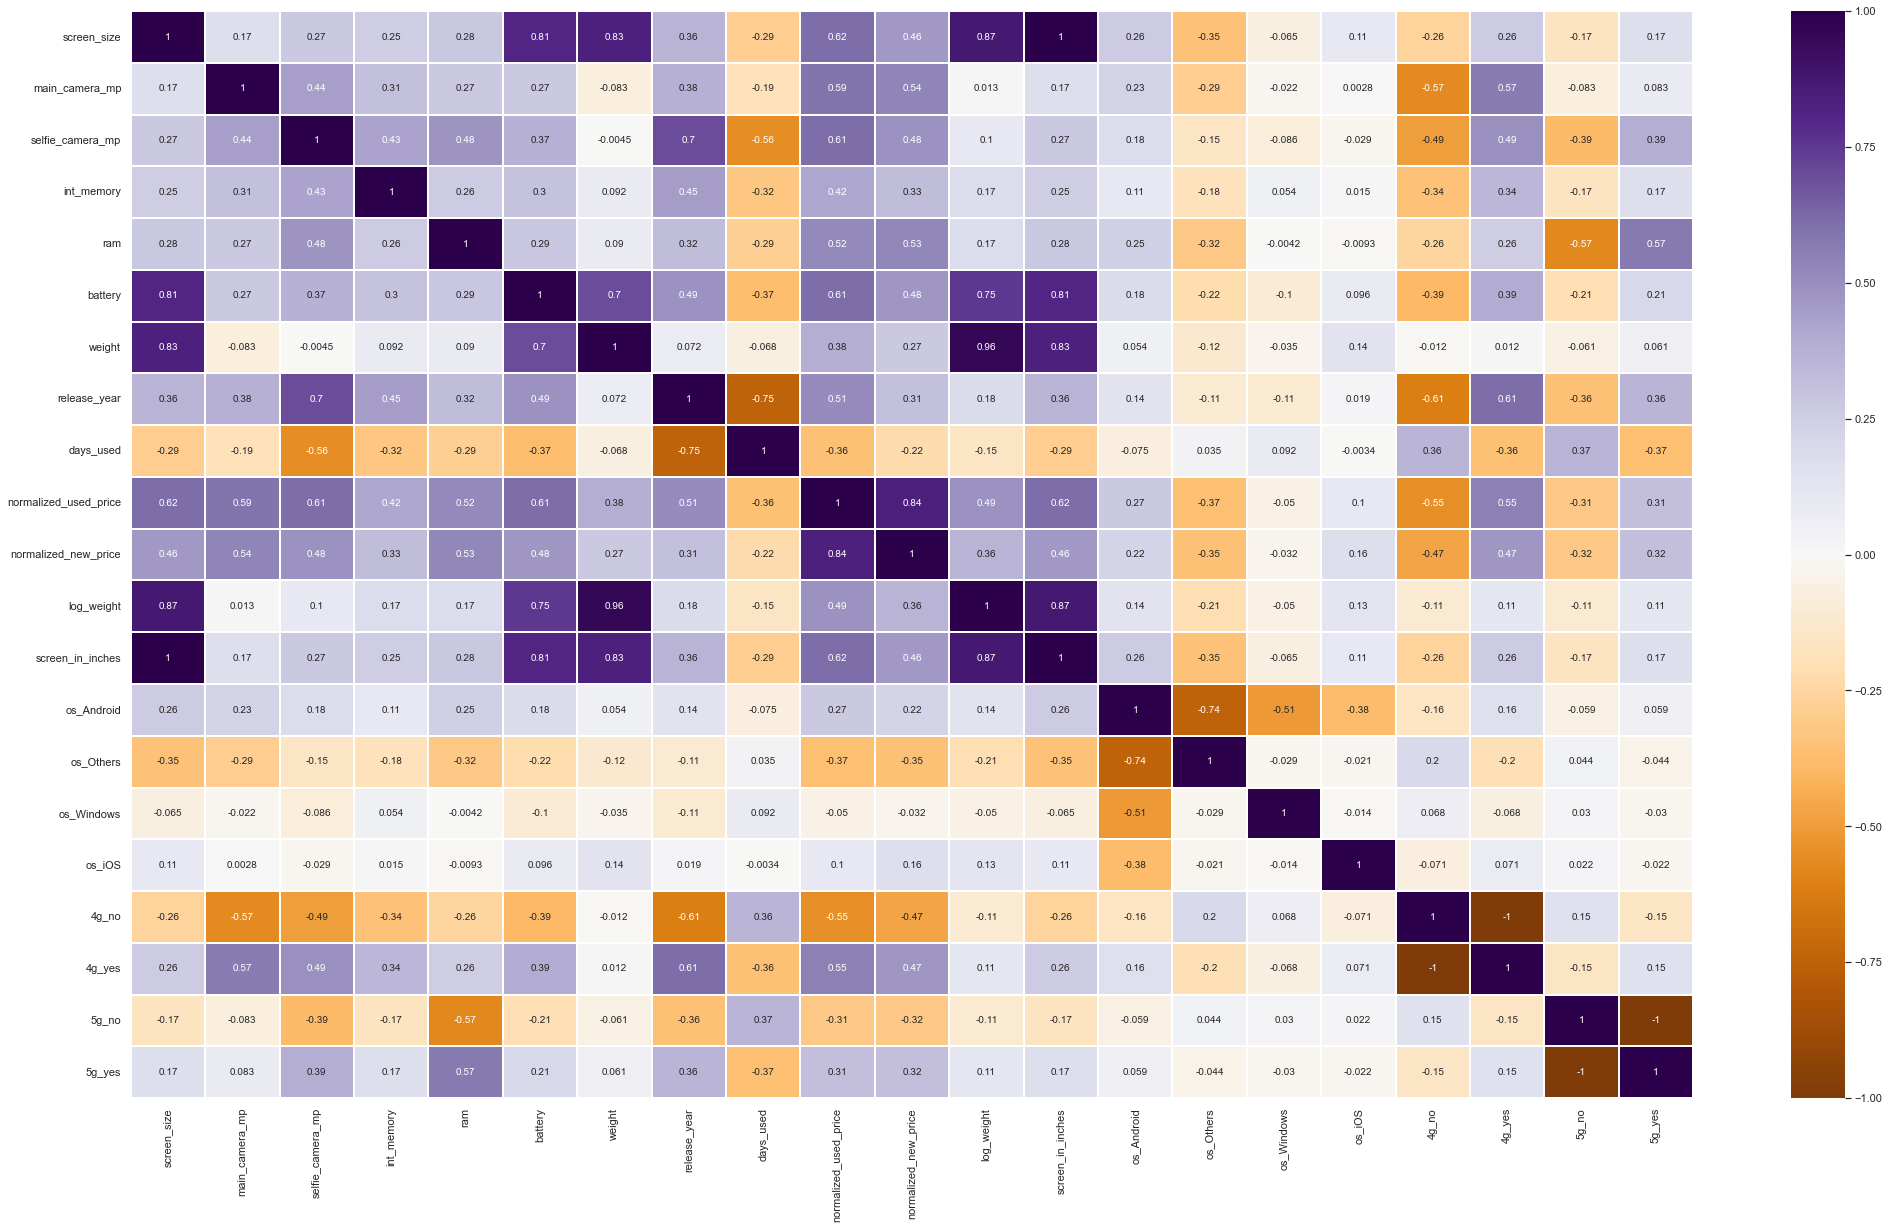

In [87]:
plt.figure(figsize=(35,20))
dfcorr = df5.drop(['brand_name'],axis=1).corr()

linewidths = 1.5
linecolor = "white"
cmap='PuOr'

# plotting the heatmap
hm = sns.heatmap(data=dfcorr,
                linewidths=linewidths,
                linecolor=linecolor,
                cmap=cmap,
                annot=True
                 )

# displaying the plotted heatmap
plt.show()

In [88]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3444.0,13.707184,3.808973,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3444.0,9.622294,4.755529,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3444.0,6.515024,6.853012,0.000000,2.000000,5.000000,8.000000,30.547331
int_memory,3444.0,24.582522,7.657617,0.010000,16.000000,30.547331,30.547331,30.547331
ram,3444.0,4.040250,1.363412,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3444.0,3127.735918,1297.025474,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3444.0,182.631736,88.485261,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3444.0,2015.954704,2.293263,2013.000000,2014.000000,2015.000000,2018.000000,2020.000000
days_used,3444.0,675.919570,248.112174,91.000000,537.750000,691.000000,870.000000,1094.000000
normalized_used_price,3444.0,4.364635,0.589742,1.536867,4.033400,4.405072,4.757934,6.619433


In [89]:
df5.columns


Index(['brand_name', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'normalized_new_price', 'log_weight',
       'screen_in_inches', 'os_Android', 'os_Others', 'os_Windows', 'os_iOS',
       '4g_no', '4g_yes', '5g_no', '5g_yes'],
      dtype='object')

In [90]:
#Defining X and y variables
X = df5.drop(['brand_name', 'normalized_used_price'], axis=1)

y = df5["normalized_used_price"]

In [91]:
print(X.head())
print()
print(y.head())

   screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0   30.547331  3.0   3020.0   
1        17.30            13.0              16.0   30.547331  8.0   4300.0   
2        16.69            13.0               8.0   30.547331  8.0   4200.0   
3        25.50            13.0               8.0   30.547331  6.0   7250.0   
4        15.32            13.0               8.0   30.547331  3.0   5000.0   

   weight  release_year  days_used  normalized_new_price  log_weight  \
0   146.0          2020        127              4.715100    4.983607   
1   213.0          2020        325              5.519018    5.361292   
2   213.0          2020        162              5.884631    5.361292   
3   480.0          2020        345              5.630961    6.173786   
4   185.0          2020        293              4.947837    5.220356   

   screen_in_inches  os_Android  os_Others  os_Windows  os_iOS  4g_no  4g_yes  \
0          5.7086

In [92]:
X = sm.add_constant(X)

In [93]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,

)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,log_weight,screen_in_inches,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
0,1.0,14.50,13.0,5.0,30.547331,3.0,3020.0,146.0,2020,127,...,4.983607,5.708661,1,0,0,0,0,1,1,0
1,1.0,17.30,13.0,16.0,30.547331,8.0,4300.0,213.0,2020,325,...,5.361292,6.811024,1,0,0,0,0,1,0,1
2,1.0,16.69,13.0,8.0,30.547331,8.0,4200.0,213.0,2020,162,...,5.361292,6.570866,1,0,0,0,0,1,0,1
3,1.0,25.50,13.0,8.0,30.547331,6.0,7250.0,480.0,2020,345,...,6.173786,10.039370,1,0,0,0,0,1,0,1
4,1.0,15.32,13.0,8.0,30.547331,3.0,5000.0,185.0,2020,293,...,5.220356,6.031496,1,0,0,0,0,1,1,0


In [94]:
#Splitting the data 70:30 ratio 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [95]:
print("The number of rows in the training data =", X_train.shape[0])
print("The number of rows in the test data =", X_test.shape[0])

The number of rows in the training data = 2410
The number of rows in the test data = 1034


## Model Building - Linear Regression

In [96]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.854
Model:                               OLS   Adj. R-squared:                  0.853
Method:                    Least Squares   F-statistic:                     875.8
Date:                   Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                           19:55:40   Log-Likelihood:                 157.27
No. Observations:                   2410   AIC:                            -280.5
Df Residuals:                       2393   BIC:                            -182.1
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observations:

1.   Adjusted R-squared:
        - Indicates the fit of the model, and value ranges from 0 to 1, with a higher number indicating a better fit.  
        - The Adjusted R-squared for this model is **0.853**
2.   Constant Coefficient (y-intercept):
        - Represents the y-intercept and it indicates the expected output given that all the predictor variable coefficients are equal to zero.  
        - The constant coefficient is : **-25.061**




## Model Performance Check

In [97]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [98]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)
    
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
{
"RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
},
index=[0], )
    return df_perf

In [99]:
print("Training Performance:")
olsmodel_tr_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_tr_perf

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226685,0.176504,0.854139,0.852856,4.248994


In [100]:
print("Test Performance:")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244488,0.18947,0.822538,0.818855,4.529308


Observations:
- The R-squared value for the training set is **0.853**so the model is not underfitting. as the R-squared for the test is **0.819**
- The train and test RMSE are comparable so it is not overfitting either.
- The MAE on the test data suggests the model can predict within  **4.529**

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1. NO MULTICOLLINEARITY

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [102]:
checking_vif(X_train)

c:\Users\watte\.conda\anaconda1\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\watte\.conda\anaconda1\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,0.000000
1,screen_size,inf
2,main_camera_mp,2.030889
3,selfie_camera_mp,2.586703
4,int_memory,1.384831
5,ram,2.069489
6,battery,3.942035
7,weight,19.200923
8,release_year,4.734848
9,days_used,2.434518


Observations:
    - There are 2 columns with p-value greater than 5, which means multicollinearity is present.
    - log_weight and weight are the columns with VIF greater than 5. 
    - To address the issue we must drop the columns that have p-value greater than 5.
    - We will disregard the VIF values for dummy variables as well as the constant. 


In [103]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [104]:
col_list = ["log_weight", "weight"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.853070,0.227561
1,log_weight,0.850261,0.229726


In [105]:
col_to_drop = "weight"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


c:\Users\watte\.conda\anaconda1\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\watte\.conda\anaconda1\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,0.000000
1,screen_size,inf
2,main_camera_mp,2.015126
3,selfie_camera_mp,2.573824
4,int_memory,1.381078
5,ram,2.062338
6,battery,3.932113
7,release_year,4.636377
8,days_used,2.423418
9,normalized_new_price,2.624425


In [106]:
#rebuilding model after dropping high VIF feature
olsmodel1 = sm.OLS(y_train, x_train2).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.854
Model:                               OLS   Adj. R-squared:                  0.853
Method:                    Least Squares   F-statistic:                     933.4
Date:                   Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                           19:55:41   Log-Likelihood:                 156.00
No. Observations:                   2410   AIC:                            -280.0
Df Residuals:                       2394   BIC:                            -187.4
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observations:
- Multicollinearity has been addressed after dropping the weight feature. 
- Adj. R-squared is **0.853** after removing multicollinearity.
- The adjusted R-squared did not drop much at all after removing the high VIF feature, which means that the weight feature didn't have much of an effect on the model.

Addressing p-values:
- After removing multicollinearity, the next step is to address p-values.
- The features that have p-values greater than 

Each independent feature has a null and alternate hypothesis:
    - Null Hypothesis: Independent feature is not significant.
    - Alternate Hypothesis: Independent feature is significant.
    - Test performed considering a 0.05 or 5% significance level, with a p-value less than 0.05 is considered statistically significant.

In [107]:
# initial list of columns
predictors = X_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'release_year', 'normalized_new_price', 'log_weight', 'screen_in_inches', 'os_Android', 'os_Others', 'os_Windows', 'os_iOS', '4g_no', '4g_yes', '5g_no', '5g_yes']


int_memory and days_used were dropped since they had values larger than 0.05. 

In [108]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [109]:
#Checking model now that features with high p-values have been removed
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.854
Model:                               OLS   Adj. R-squared:                  0.853
Method:                    Least Squares   F-statistic:                     1075.
Date:                   Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                           19:55:41   Log-Likelihood:                 152.97
No. Observations:                   2410   AIC:                            -277.9
Df Residuals:                       2396   BIC:                            -196.9
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [110]:
print("Training Performance")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227089,0.176734,0.853617,0.852515,4.253778


In [111]:
print("Test Performance")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244842,0.189801,0.822023,0.818867,4.53845


Observations:
    - All features have p-values less than 0.05.
    - The features in the x_train3 will be the final set of predictors.
    - olsmodel2 will be the final model. 
    - There are still some tests that need to be performed however.


2-3. LINEARITY AND INDEPENDENCE

- To test for linearity of and independence, the fitted values and the residuals will be plotted.
- As long as the plotted values do not follow a pattern, then the model can be declared linear.

In [112]:
df_pred_values = pd.DataFrame()

df_pred_values["Actual Values"] = y_train
df_pred_values["Fitted Values"] = olsmodel2.fittedvalues
df_pred_values["Residuals"] = olsmodel2.resid

df_pred_values.head()

,Actual Values,Fitted Values,Residuals
1362,3.735524,3.725647,0.009877
3325,4.435567,4.285360,0.150208
1447,4.540205,4.329522,0.210683
3372,4.799091,4.870400,-0.071309
2415,5.091293,4.739818,0.351476


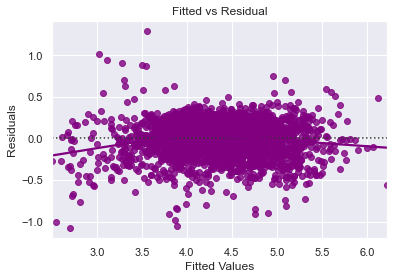

In [113]:
sns.residplot(
    data=df_pred_values, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual")
plt.show()

No pattern is present, so this model pasts the test for linearity and independence.

4. NORMALITY 


A. Plot residuals and see if bell-shape is present

B. Shapiro-Wilks Test
    - Null Hypothesis: Residuals are normally distributed
    - Alternate Hypothesis: Residuals are not normally distributed

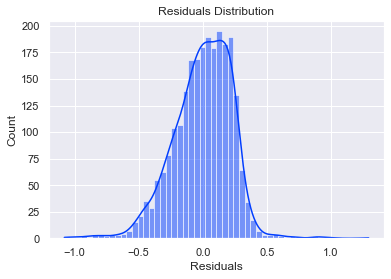

In [114]:
#plotting the residuals on histogram to see if the distribution is bell-shaped or normal
sns.histplot(data=df_pred_values, x="Residuals", kde=True)
plt.title("Residuals Distribution")
plt.show()

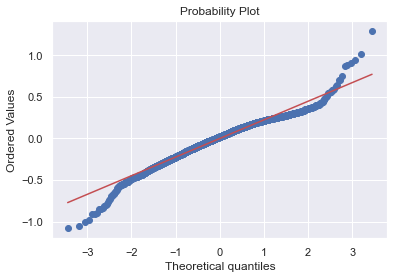

In [115]:
#plotting residuals on qqplot to test normality
import pylab
import scipy.stats as stats
stats.probplot(df_pred_values["Residuals"], dist="norm", plot=pylab)
plt.show()

Besides the tails, the distribution is close enough to accept as normal.  

In [120]:
stats.shapiro(df_pred_values["Residuals"])

ShapiroResult(statistic=0.9711424708366394, pvalue=1.2537763952573772e-21)

- The residuals failed the Shapiro-Wilks Test; however, we can still declare the distribution as normal as an approximation.

5. HOMOSCEDASTICITY

To test for homoscedasticity, the Goldfeldquandt test will be used.
    -If p-value is greater than 0.05, we can say the residuals are homoscedastic.
    -If the residuals are less than 0.05, the residuals are heteroscedastic.

In [125]:
import statsmodels.stats.api as sms 
from statsmodels.compat import lzip

values = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred_values["Residuals"], x_train3)
lzip(values, test)

[('F statistic', 1.0134677049413783), ('p-value', 0.4087386624854597)]

The residuals are greater than 0.05; therefore, the residuals are homoscedastic. 

Now that all the assumptions have been satisfied, the final model will be built. 

Final Model

In [127]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [128]:

final_olsmodel = sm.OLS(y_train, x_train3).fit()
print(final_olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.854
Model:                               OLS   Adj. R-squared:                  0.853
Method:                    Least Squares   F-statistic:                     1075.
Date:                   Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                           20:34:17   Log-Likelihood:                 152.97
No. Observations:                   2410   AIC:                            -277.9
Df Residuals:                       2396   BIC:                            -196.9
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

####Observations:

In [131]:
print("Training Performance:\n")
final_olsmodel_training = model_performance_regression(
    final_olsmodel, x_train_final, y_train
)
final_olsmodel_training

Training Performance:



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.227089,0.176734,0.853617,0.852515,4.253778


A bell shape is present in the above plot
    - next we will check the qqplot

In [133]:
print("Test Performance:")
final_olsmodel_test = model_performance_regression(
    final_olsmodel, x_test_final, y_test
)
final_olsmodel_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244842,0.189801,0.822023,0.818867,4.53845


## Actionable Insights and Recommendations 

- 


___